In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    """
    :param p: array, 多项式系数
    """
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.3) + y1 for y1 in y_]

def fitting(M=0):
    """
    M为多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

In [4]:
p_init = np.random.rand(9+1)
p_init

array([0.03168449, 0.59739345, 0.56656317, 0.23256905, 0.79918559,
       0.89862594, 0.98258122, 0.6576354 , 0.77567713, 0.07678156])

Fitting Parameters: [0.03547998]


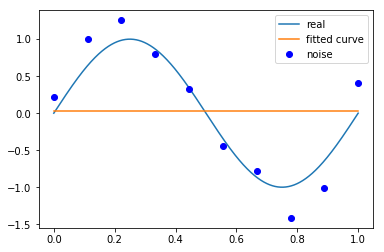

In [5]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.71358264  0.8922713 ]


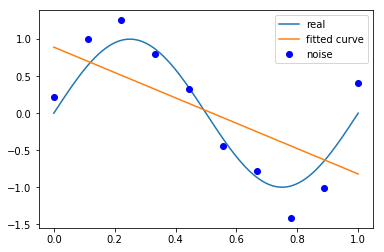

In [6]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 1.32650675 -3.04008938  1.08879082]


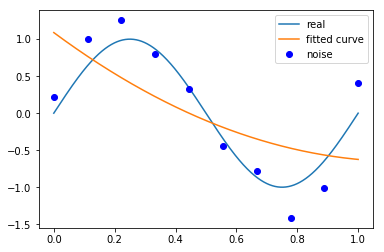

In [7]:
# M=2
p_lsq_2 = fitting(M=2)

Fitting Parameters: [ 26.56170528 -38.51605113  12.07712803   0.17060841]


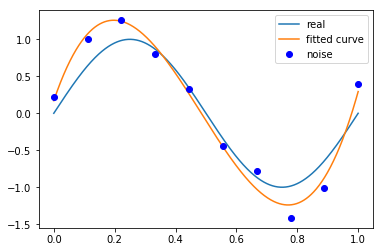

In [8]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-4.57436644e+04  2.03463090e+05 -3.80183818e+05  3.87872691e+05
 -2.34862569e+05  8.57407479e+04 -1.82047991e+04  1.99620674e+03
 -7.77053076e+01  2.23338363e-01]


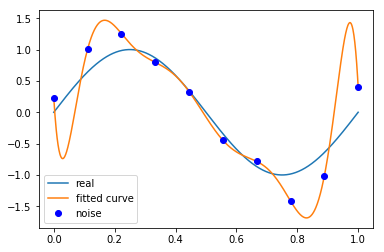

In [9]:
# M=9
p_lsq_9 = fitting(M=9)

In [10]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

In [11]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

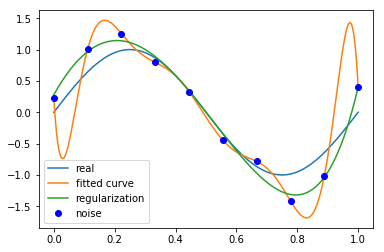

In [12]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()